##### Copyright 2020 Qiyang Hu & Shao-Ching Huang

In [0]:
#@title Licensed under MIT License (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://huqy.github.io/var/LICENSE.md
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Getting raw data

2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE ([source](https://github.com/CSSEGISandData/COVID-19))

In [0]:
import pandas as pd
import numpy as np

In [0]:
conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900


# Inspecting Infection Numbers

In [0]:
#today = conf_df.columns[len(conf_df.columns)-1]
today = conf_df.columns[-1]
today

'3/19/20'

In [0]:
#num_start_count = 140  # added into get_list() below

In [0]:
def get_list(col2search, val2search, conf_df, num_start_count=140):
#def get_list(col2search, val2search, conf_df):
  ts_list = conf_df[(conf_df[col2search] == val2search)]
  if ts_list.shape[0] > 1: # if the list has more than one row, we will do sum
    #ts_series = ts_list.sum(axis = 0, skipna = True)[4:]
    ts_series = ts_list.sum(axis = 0, skipna = True)[4:].astype(int)
    eff_dates = ts_series[ts_series > num_start_count].index
  else:
    ts_series = ts_list.drop(ts_list.columns[[0, 1, 2, 3]], axis=1).iloc[0]
    eff_dates = ts_series[ts_series > num_start_count].index
  start_date = eff_dates[0]
  ts_series.name = val2search  # name the series
  ts = ts_series[start_date:]
  return ts

## Extracting US data

In [0]:
ts_us = get_list('Country/Region', 'US', conf_df)
start_us = ts_us.index[0]
d_us = range(ts_us.count())
ts_us

3/4/20       149
3/5/20       217
3/6/20       262
3/7/20       402
3/8/20       518
3/9/20       583
3/10/20      959
3/11/20     1281
3/12/20     1663
3/13/20     2179
3/14/20     2727
3/15/20     3499
3/16/20     4632
3/17/20     6421
3/18/20     7783
3/19/20    13677
Name: US, dtype: int64

## Extracting California data

In [0]:
ts_ca = get_list('Province/State', 'California', conf_df)
start_ca = ts_ca.index[0]
d_ca = range(ts_ca.count())
ts_ca

3/10/20    144
3/11/20    177
3/12/20    221
3/13/20    282
3/14/20    340
3/15/20    426
3/16/20    557
3/17/20    698
3/18/20    751
3/19/20    952
Name: California, dtype: int64

## Extracting Italy data

In [0]:
ts_it = get_list('Country/Region', 'Italy', conf_df)
start_it = ts_it.index[0]
d_it = range(ts_it.count())
ts_it

2/23/20      155
2/24/20      229
2/25/20      322
2/26/20      453
2/27/20      655
2/28/20      888
2/29/20     1128
3/1/20      1694
3/2/20      2036
3/3/20      2502
3/4/20      3089
3/5/20      3858
3/6/20      4636
3/7/20      5883
3/8/20      7375
3/9/20      9172
3/10/20    10149
3/11/20    12462
3/12/20    12462
3/13/20    17660
3/14/20    21157
3/15/20    24747
3/16/20    27980
3/17/20    31506
3/18/20    35713
3/19/20    41035
Name: Italy, dtype: int64

### Curve fitting Italy data as an inference trend

In [0]:
from scipy.optimize import curve_fit

We use exponential function with the consideration of no signs of flattening emergence.

In [0]:
def func(x, a, b, c):
  return a * np.exp(b * x) + c

In [0]:
popt, pcov = curve_fit(func, d_it, ts_it)
popt

array([ 1.32135792e+03,  1.40029850e-01, -1.82261955e+03])

## Extracting data for China (as reference)

In [0]:
ts_cn = get_list('Country/Region', 'China', conf_df)
start_cn = ts_cn.index[0]
d_cn = range(ts_cn.count())
ts_cn

1/22/20      548
1/23/20      643
1/24/20      920
1/25/20     1406
1/26/20     2075
1/27/20     2877
1/28/20     5509
1/29/20     6087
1/30/20     8141
1/31/20     9802
2/1/20     11891
2/2/20     16630
2/3/20     19716
2/4/20     23707
2/5/20     27440
2/6/20     30587
2/7/20     34110
2/8/20     36814
2/9/20     39829
2/10/20    42354
2/11/20    44386
2/12/20    44759
2/13/20    59895
2/14/20    66358
2/15/20    68413
2/16/20    70513
2/17/20    72434
2/18/20    74211
2/19/20    74619
2/20/20    75077
2/21/20    75550
2/22/20    77001
2/23/20    77022
2/24/20    77241
2/25/20    77754
2/26/20    78166
2/27/20    78600
2/28/20    78928
2/29/20    79356
3/1/20     79932
3/2/20     80136
3/3/20     80261
3/4/20     80386
3/5/20     80537
3/6/20     80690
3/7/20     80770
3/8/20     80823
3/9/20     80860
3/10/20    80887
3/11/20    80921
3/12/20    80932
3/13/20    80945
3/14/20    80977
3/15/20    81003
3/16/20    81033
3/17/20    81058
3/18/20    81102
3/19/20    81156
Name: China, d

## Plotting

In [0]:
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

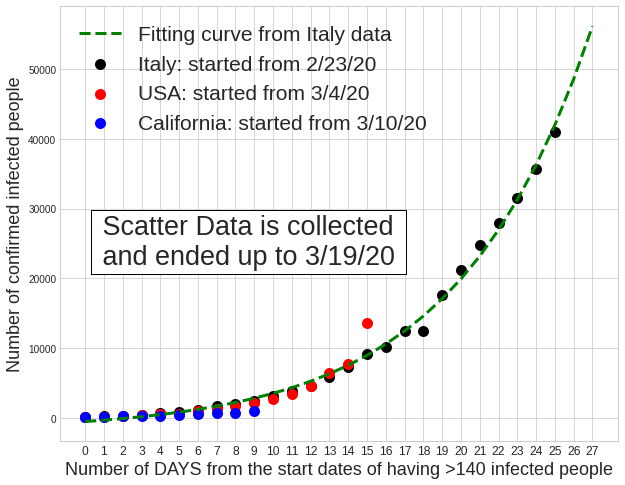

In [0]:
d_fn = range(ts_it.count()+2)

plt.figure(figsize=(10, 8))
plt.scatter(d_it, ts_it, color='black', linewidth=5, label='Italy: started from '+start_it)
plt.scatter(d_us, ts_us, color='red', linewidth=5, label='USA: started from '+start_us)
plt.scatter(d_ca, ts_ca, color='blue', linewidth=5, label='California: started from '+start_ca)
plt.plot(d_fn, func(d_fn, *popt), 'g--', linewidth=3, label="Fitting curve from Italy data")
#plt.scatter(d_cn, ts_cn, color='yellow', label='China: started from Jan 22')

plt.xticks(d_fn, fontsize="12")
plt.xlabel("Number of DAYS from the start dates of having >140 infected people", fontsize='18')
plt.ylabel("Number of confirmed infected people", fontsize='18')
plt.legend(loc='upper left', fontsize=21)
plt.text(0.5, 22000, ' Scatter Data is collected \n and ended up to '+today+" ", fontsize=27, bbox=dict(facecolor='white', alpha=1))
plt.show()

## Normalized by Population

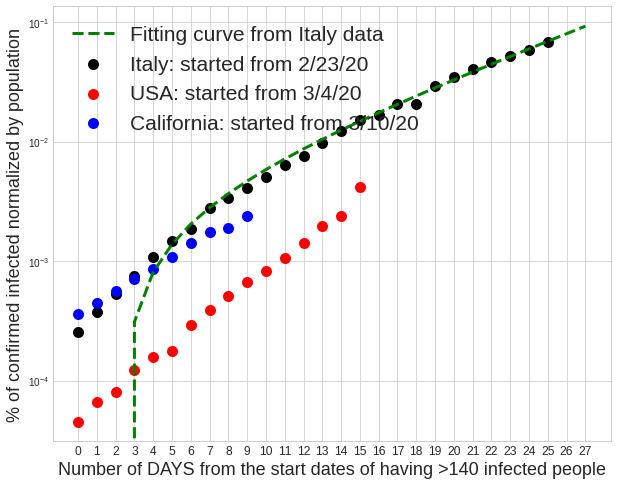

In [0]:
# population in MILLION from crude google search
us_population =  327.2  * 10**6
it_population =   60.48 * 10**6
ca_population =   39.56 * 10**6
cn_population = 1386    * 10**6

d_fn = range(ts_it.count()+2)

plt.figure(figsize=(10, 8))
plt.scatter(d_it, 100*ts_it/it_population, color='black', linewidth=5, label='Italy: started from '+start_it)
plt.scatter(d_us, 100*ts_us/us_population, color='red', linewidth=5, label='USA: started from '+start_us)
plt.scatter(d_ca, 100*ts_ca/ca_population, color='blue', linewidth=5, label='California: started from '+start_ca)
plt.plot(d_fn, 100*func(d_fn, *popt)/it_population, 'g--', linewidth=3, label="Fitting curve from Italy data")
#plt.scatter(d_cn, ts_cn, color='yellow', label='China: started from Jan 22')

plt.xticks(d_fn, fontsize="12")
plt.xlabel("Number of DAYS from the start dates of having >140 infected people", fontsize='18')
plt.ylabel("% of confirmed infected normalized by population", fontsize='18')
plt.legend(loc='upper left', fontsize=21)
#plt.text(0.5, 22000, ' Scatter Data is collected \n and ended up to '+today+" ", fontsize=27, bbox=dict(facecolor='white', alpha=1))
plt.yscale('log')

# Inspecting Lagged Days

In [0]:
data = [{'Country': "Italy",          'Population': 60461826}, 
        {'Country':"Germany",         'Population': 83783942},
        {'Country':"Sweden",          'Population': 10099265},
        {'Country':"Spain",           'Population': 46754778},
        {'Country':"Belgium",         'Population': 11589623},
        {'Country':"Switzerland",     'Population': 8654622},
        {'Country':"United Kingdom",  'Population': 67886011},
        {'Country':"US",              'Population': 331002651},
        ]
df = pd.DataFrame(data)
df

,Country,Population
0,Italy,60461826
1,Germany,83783942
2,Sweden,10099265
3,Spain,46754778
4,Belgium,11589623
5,Switzerland,8654622
6,United Kingdom,67886011
7,US,331002651


In [0]:
# UN population data (unit: thousand)

un_pop = pd.read_excel('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/EXCEL_FILES/1_Population/WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx', skiprows=16)

def un_population(country, year='2020'):
  n = un_pop[ un_pop['Region, subregion, country or area *']==country].iloc[0][year] * 1000
  return int(n)

data = [{'Country': "Italy",          'Population': un_population('Italy')}, 
        {'Country':"Germany",         'Population': un_population('Germany')},
        {'Country':"Sweden",          'Population': un_population('Sweden')},
        {'Country':"Spain",           'Population': un_population('Spain')},
        {'Country':"Belgium",         'Population': un_population('Belgium')},
        {'Country':"Switzerland",     'Population': un_population('Switzerland')},
        {'Country':"United Kingdom",  'Population': un_population('United Kingdom')},
        {'Country':"US",              'Population': un_population('United States of America')},
       ]
df = pd.DataFrame(data_un)
df

,Country,Population
0,Italy,60461828
1,Germany,83783945
2,Sweden,10099270
3,Spain,46754783
4,Belgium,11589616
5,Switzerland,8654618
6,United Kingdom,67886004
7,US,331002647


In [0]:
days = []
infect_latest = []
infect_latest_norm = []
for index, row in df.iterrows():
  country = row['Country']
  population = row['Population']
  ts = get_list('Country/Region', country, conf_df)
  infect_latest.append(ts[-1])
  infect_latest_norm.append(ts[-1]/population)
  days.append( ts.count() )
d_max = max(days)
df['Lagged_days'] = d_max - days
df['Latest_infections'] = infect_latest
df['Normalized_Latest_infections'] = infect_latest_norm
df

,Country,Population,Lagged_days,Latest_infections,Normalized_Latest_infections
0,Italy,60461828,0,41035,0.000679
1,Germany,83783945,8,15320,0.000183
2,Sweden,10099270,13,1439,0.000142
3,Spain,46754783,9,17963,0.000384
4,Belgium,11589616,13,1795,0.000155
5,Switzerland,8654618,12,4075,0.000471
6,United Kingdom,67886004,12,2716,0.000040
7,US,331002647,10,13677,0.000041
